In [324]:
import sys
sys.path.append("../../common")

In [325]:
from aoc import *
import numpy as np
import re
import shapely

In [326]:
with open("./puzzle_inputs/18.txt") as f:
    lines = f.readlines()

In [327]:
lines = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)""".split('\n')

In [328]:
dmap = {
    'u': 'n',
    'l': 'w',
    'r': 'e',
    'd': 's'
}
dig_dir = 'eswn'

In [329]:
def is_outside_turn(d1, d2, inside_on_right=True):
    return inside_on_right and turn(d1, -90) == d2 \
        or not inside_on_right and turn(d1, 90) == d2

In [330]:
revdir('s')

'n'

In [322]:
current = arr((0, 0))
verts = []
prev_d = None
for line in lines + [lines[0]]:
    d, n, h = line.lower().split()
    n = int(n)
    d = dmap[d]
    offset_dir = None
    if prev_d is not None and is_outside_turn(prev_d, d):
        offset_dir = prev_d+revdir(d)
        # print("Outside turn... Moving toward", offset_dir)
    elif prev_d and not is_outside_turn(prev_d, d):
        offset_dir = revdir(prev_d)+d
        # print("Inside turn... Moving toward", offset_dir)
    if offset_dir is not None:
        verts.append(current + 0.5*dirdelta(offset_dir))
    current = current + n*dirdelta(d)
    prev_d = d

In [323]:
shapely.Polygon(verts).area

76387.0

In [273]:
def create_polygon(lines, offset=0):
    current = arr((offset))
    points = []
    for line in lines:
        d, n, h = line.lower().split()
        n = int(n)
        d = dmap[d]
        current = current + n*dirdelta(d)
        points.append(current)
    return shapely.Polygon(points)

In [276]:
p1 = create_polygon(lines)

In [278]:
p1.bounds

(0.0, 0.0, 9.0, 6.0)

In [266]:
current = arr((0, 0))
points = []
for line in lines:
    d, n, h = line.lower().split()
    n = int(n)
    d = dmap[d]
    current = current + n*dirdelta(d)
    points.append(current)
# offset = np.min(points)
# points = [p - offset + 2 for p in points]

In [ ]:
current = arr((1, 1))
points = []
for line in lines:
    d, n, h = line.lower().split()
    n = int(n)
    d = dmap[d]
    current = current + n*dirdelta(d)
    points.append(current)
# offset = np.min(points)
# points = [p - offset + 2 for p in points]

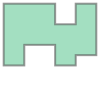

In [268]:
polygon = shapely.Polygon(points)
polygon

In [269]:
polygon.area

42.0

In [ ]:
polygon.

In [197]:
points

[array([0, 0]),
 array([0, 6]),
 array([5, 6]),
 array([5, 4]),
 array([7, 4]),
 array([7, 6]),
 array([9, 6]),
 array([9, 1]),
 array([7, 1]),
 array([7, 0]),
 array([5, 0]),
 array([5, 2]),
 array([2, 2]),
 array([2, 0]),
 array([0, 0])]

In [207]:
for (y1, x1), (y2, x2) in zip(points, np.roll(points, -1, axis=0)):
    if y1 == y2:
        midpoint = (x2 - x1)/2
        point = shapely.Point((midpoint, y1-0.5))
        if polygon.contains(point):
            print("Bottom edge found")
        else:
            print("Top edge found")
        # horizontal edge
        # print("Horizontal")
    else:
        # vertical edge
        print("Vertical")

Top edge found
Vertical
Top edge found
Vertical
Top edge found
Vertical
Top edge found
Vertical
Top edge found
Vertical
Bottom edge found
Vertical
Top edge found
Vertical
Top edge found


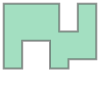

In [174]:
polygon.

In [170]:
polygon.area

52.0

In [157]:
voxel = Voxel(polygon.bounds[:2], np.array(polygon.bounds[2:]) + 1)
voxel.volume()

/tmp/ipykernel_3360931/206501628.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  voxel.volume()


70

In [ ]:
for

In [152]:
polygon.bounds[::2]

(2.0, 11.0)

In [ ]:
voxel.subdivide()

In [134]:
current = arr((0, 0))
points = [current]
for line in lines[:-1]:
    _, _, h = line.lower().strip().split()
    n = int(h[2:-2], 16)
    d = dig_dir[int(h[-2])]
    points.append(points[-1] + n*dirdelta(d))
points = np.array(points)

In [135]:
points

array([[      0,       0],
       [      0,  461937],
       [  56407,  461937],
       [  56407,  818608],
       [ 919647,  818608],
       [ 919647, 1186328],
       [1186328, 1186328],
       [1186328,  609066],
       [ 356353,  609066],
       [ 356353,  497056],
       [1186328,  497056],
       [1186328,    5411],
       [ 500254,    5411],
       [ 500254,       0]])

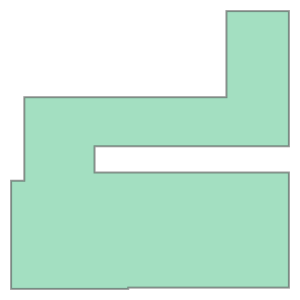

In [136]:
shapely.Polygon(points).area